In [1]:
import pandas as pd
import os
from time import time
from time import sleep
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Connecting to api

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '# Insert API Key here',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
# If that doesn't work use the local host URL

{'status': {'timestamp': '2023-09-06T13:16:16.467Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9269}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10447, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
# Display max columns/rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Add timestamp column

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10447,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.947790e+07,1.947790e+07,False,NaN,1,NaN,NaN,None,2023-09-06T13:14:00.000Z,25676.537712,1.011727e+10,-8.4364,-0.155181,-0.416660,-6.331944,-11.479795,-14.980834,-2.670388,5.001250e+11,48.1523,5.392073e+11,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
1,1027,Ethereum,ETH,ethereum,7339,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202185e+08,1.202185e+08,True,NaN,2,NaN,NaN,None,2023-09-06T13:14:00.000Z,1630.253450,3.676675e+09,-18.1919,-0.127588,-0.222913,-5.222056,-10.878660,-12.260760,-11.521000,1.959867e+11,18.8752,1.959867e+11,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
2,825,Tether USDt,USDT,tether,61599,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.290792e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.999425,1.692190e+10,-7.1948,-0.002059,0.017822,-0.038203,0.142878,-0.063015,-0.048405,8.286027e+10,7.9801,8.538810e+10,None,2023-09-06T13:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-06 13:16:38.525001+00:00
3,1839,BNB,BNB,bnb,1608,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538497e+08,1.538497e+08,False,NaN,4,NaN,NaN,None,2023-09-06T13:14:00.000Z,214.685715,2.823421e+08,-14.1751,-0.122787,-0.185591,-4.507660,-11.199532,-9.184934,-18.891043,3.302934e+10,3.1810,3.302934e+10,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
4,52,XRP,XRP,xrp,1063,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.297770e+10,9.998846e+10,False,NaN,5,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.501162,6.977758e+08,-10.9689,0.050964,-0.248504,-5.510948,-18.850779,7.305895,-3.745694,2.655043e+10,2.5570,5.011623e+10,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
5,3408,USD Coin,USDC,usd-coin,13959,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.600000e+10,2.600000e+10,False,NaN,6,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.999979,2.343080e+09,-6.4766,0.001543,-0.001114,0.011504,0.005653,0.004851,0.011876,2.599946e+10,2.5032,2.599946e+10,None,2023-09-06T13:14:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-06 13:16:38.525001+00:00
6,74,Dogecoin,DOGE,dogecoin,778,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.408956e+11,1.408956e+11,True,NaN,7,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.063777,1.765366e+08,-17.6304,-0.157370,-0.417223,-2.708337,-13.752198,-2.358905,-6.179512,8.985919e+09,0.8655,8.985919e+09,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
7,2010,Cardano,ADA,cardano,926,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.508407e+10,3.613741e+10,False,NaN,8,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.255818,1.009534e+08,11.6610,-0.094862,-0.320899,-3.414519,-12.742280,-10.530091,-21.842974,8.975131e+09,0.8644,1.151180e+10,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
8,5426,Solana,SOL,solana,504,2020-04-10T00:

In [5]:
# Define function to pull data from API

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'bf148ee3-a782-4129-8f32-e9ad50713557',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    df = pd.concat([df, df2], axis=0)

In [6]:
# Only ran api_runner 3 times for practice purposes

for i in range(15):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # Sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10443,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.947728e+07,1.947728e+07,False,NaN,1,NaN,NaN,None,2023-09-05T21:24:00.000Z,25738.088359,1.154099e+10,12.7986,0.084826,0.006861,-7.060145,-11.712459,-15.117543,-2.635046,5.013080e+11,48.2395,5.404999e+11,None,2023-09-05T21:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-05 21:26:31.547955+00:00
1,1027,Ethereum,ETH,ethereum,7336,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202182e+08,1.202182e+08,True,NaN,2,NaN,NaN,None,2023-09-05T21:24:00.000Z,1630.983624,4.727030e+09,32.0908,-0.042165,0.468183,-5.843909,-11.064793,-12.712601,-11.509516,1.960739e+11,18.8652,1.960739e+11,None,2023-09-05T21:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-05 21:26:31.547955+00:00
2,825,Tether USDt,USDT,tether,61406,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.290552e+10,8.543720e+10,True,NaN,3,NaN,NaN,None,2023-09-05T21:24:00.000Z,0.999401,1.893600e+10,8.7362,-0.013238,-0.042264,-0.089329,0.081767,-0.085135,-0.072029,8.285582e+10,7.9719,8.538599e+10,None,2023-09-05T21:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-05 21:26:31.547955+00:00
3,1839,BNB,BNB,bnb,1606,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538498e+08,1.538498e+08,False,NaN,4,NaN,NaN,None,2023-09-05T21:24:00.000Z,214.507872,3.006830e+08,-15.4011,0.032263,-0.214168,-5.306335,-11.967476,-8.909030,-17.571177,3.300200e+10,3.1753,3.300200e+10,None,2023-09-05T21:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-05 21:26:31.547955+00:00
4,52,XRP,XRP,xrp,1061,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.297770e+10,9.998846e+10,False,NaN,5,NaN,NaN,None,2023-09-05T21:24:00.000Z,0.504696,7.665108e+08,-7.2009,0.312582,-0.391971,-6.668595,-19.922574,7.795753,-3.753898,2.673761e+10,2.5725,5.046956e+10,None,2023-09-05T21:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-05 21:26:31.547955+00:00
5,3408,USD Coin,USDC,usd-coin,13953,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.599536e+10,2.599536e+10,False,NaN,6,NaN,NaN,None,2023-09-05T21:24:00.000Z,0.999902,2.616658e+09,19.7038,-0.024422,-0.028906,-0.040388,-0.013499,-0.012770,-0.009767,2.599283e+10,2.5012,2.599283e+10,None,2023-09-05T21:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-05 21:26:31.547955+00:00
6,2010,Cardano,ADA,cardano,924,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.508148e+10,3.613741e+10,False,NaN,7,NaN,NaN,None,2023-09-05T21:24:00.000Z,0.257001,9.315720e+07,-2.2733,0.079285,0.815451,-6.476846,-12.471160,-9.582088,-20.615343,9.015975e+09,0.8672,1.156504e+10,None,2023-09-05T21:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-05 21:26:31.547955+00:00
7,74,Dogecoin,DOGE,dogecoin,776,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.408867e+11,1.408867e+11,True,NaN,8,NaN,NaN,None,2023-09-05T21:24:00.000Z,0.063919,2.191990e+08,24.5142,0.166185,1.672530,-4.238982,-15.624078,-2.139173,-5.141850,9.005336e+09,0.8664,9.005336e+09,None,2023-09-05T21:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-05 21:26:31.547955+00:00
8,5426,Solana,SOL,solana,502,2020-04-10T00:00:00.0

In [25]:
# Modify columns that show in scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10447,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19477900.00000,19477900.00000,False,NaN,1,NaN,NaN,None,2023-09-06T13:14:00.000Z,25676.53771,10117273223.77547,-8.43640,-0.15518,-0.41666,-6.33194,-11.47979,-14.98083,-2.67039,500125033906.55383,48.15230,539207291958.46002,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
1,1027,Ethereum,ETH,ethereum,7339,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120218534.10905,120218534.10905,True,NaN,2,NaN,NaN,None,2023-09-06T13:14:00.000Z,1630.25345,3676674572.07791,-18.19190,-0.12759,-0.22291,-5.22206,-10.87866,-12.26076,-11.52100,195986680030.79984,18.87520,195986680030.79999,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
2,825,Tether USDt,USDT,tether,61599,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82907915063.49493,85437198727.25960,True,NaN,3,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.99943,16921897523.07480,-7.19480,-0.00206,0.01782,-0.03820,0.14288,-0.06301,-0.04840,82860265846.12558,7.98010,85388095868.38000,None,2023-09-06T13:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-06 13:16:38.525001+00:00
3,1839,BNB,BNB,bnb,1608,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153849731.98585,153849731.98585,False,NaN,4,NaN,NaN,None,2023-09-06T13:14:00.000Z,214.68572,282342107.70793,-14.17510,-0.12279,-0.18559,-4.50766,-11.19953,-9.18493,-18.89104,33029339764.24735,3.18100,33029339764.25000,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
4,52,XRP,XRP,xrp,1063,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52977697600.00000,99988458761.00000,False,NaN,5,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.50116,697775800.62770,-10.96890,0.05096,-0.24850,-5.51095,-18.85078,7.30589,-3.74569,26550427140.90948,2.55700,50116234460.35000,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
5,3408,USD Coin,USDC,usd-coin,13959,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,26000002980.51763,26000002980.51763,False,NaN,6,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.99998,2343079510.03423,-6.47660,0.00154,-0.00111,0.01150,0.00565,0.00485,0.01188,25999462763.94380,2.50320,25999462763.94000,None,2023-09-06T13:14:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-06 13:16:38.525001+00:00
6,74,Dogecoin,DOGE,dogecoin,778,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140895646383.70523,140895646383.70523,True,NaN,7,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.06378,176536551.22951,-17.63040,-0.15737,-0.41722,-2.70834,-13.75220,-2.35891,-6.17951,8985919096.94522,0.86550,8985919096.95000,None,2023-09-06T13:14:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-06 13:16:38.525001+00:00
7,2010,Cardano,ADA,cardano,926,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35084071060.29600,36137410585.88500,False,NaN,8,NaN,NaN,None,2023-09-06T13:14:00.000Z,0.25582,100953405.99630,11.66100,-0.09486,-0.32090,-3.41452,-12.74228,-10.53009,-21.84297,897513148

In [8]:
# Grouping columns by name and finding the average % change based on time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.126477,-0.357169,-6.341569,-11.453732,-14.958947,-2.617269
Ethereum,-0.112165,-0.173444,-5.222230,-10.850997,-12.243765,-11.479422
Tether USDt,0.001853,0.024517,-0.037487,0.145646,-0.060840,-0.047206
BNB,-0.119167,-0.178817,-4.496428,-11.198045,-9.183105,-18.920150
XRP,0.044341,-0.247950,-5.496020,-18.822286,7.319839,-3.756699
USD Coin,0.005494,0.002595,0.013048,0.011736,0.009343,0.014970
Dogecoin,-0.148382,-0.398339,-2.710395,-13.743987,-2.353816,-6.197435
Cardano,-0.101572,-0.320306,-3.445086,-12.753706,-10.518786,-21.852067
Solana,-0.002255,0.660161,-7.819466,-13.929590,-9.315308,5.054026


In [9]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.126477
             quote.USD.percent_change_24h    -0.357169
             quote.USD.percent_change_7d     -6.341569
             quote.USD.percent_change_30d   -11.453732
             quote.USD.percent_change_60d   -14.958947
             quote.USD.percent_change_90d    -2.617269
Ethereum     quote.USD.percent_change_1h     -0.112165
             quote.USD.percent_change_24h    -0.173444
             quote.USD.percent_change_7d     -5.222230
             quote.USD.percent_change_30d   -10.850997
             quote.USD.percent_change_60d   -12.243765
             quote.USD.percent_change_90d   -11.479422
Tether USDt  quote.USD.percent_change_1h      0.001853
             quote.USD.percent_change_24h     0.024517
             quote.USD.percent_change_7d     -0.037487
             quote.USD.percent_change_30d     0.145646
             quote.USD.percent_change_60d    -0.060840
             quote.USD.

In [10]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -0.126477
            quote.USD.percent_change_24h  -0.357169
            quote.USD.percent_change_7d   -6.341569
            quote.USD.percent_change_30d -11.453732
            quote.USD.percent_change_60d -14.958947
            quote.USD.percent_change_90d  -2.617269
Ethereum    quote.USD.percent_change_1h   -0.112165
            quote.USD.percent_change_24h  -0.173444
            quote.USD.percent_change_7d   -5.222230
            quote.USD.percent_change_30d -10.850997
            quote.USD.percent_change_60d -12.243765
            quote.USD.percent_change_90d -11.479422
Tether USDt quote.USD.percent_change_1h    0.001853
            quote.USD.percent_change_24h   0.024517
            quote.USD.percent_change_7d   -0.037487
            quote.USD.percent_change_30d   0.145646
            quote.USD.percent_change_60d  -0.060840
            quote.USD.percent_change_90d  -0.047206
BNB         quote.USD.percent_change_1h   -0.119167
            quote.USD.percent_change_24h  -0.178817
            quote.USD.percent_change_7d   -4.496428
            quote.USD.percent_change_30d -11.198045
            quote.USD.percent_change_60d  -9.183105
            quote.USD.percent_change_90d -18.920150
XRP         quote.USD.percent_change_1h    0.044341
            quote.USD.percent_change_24h  -0.247950
            quote.USD.percent_change_7d   -5.496020
            quote.USD.percent_change_30d -18.822286
            quote.USD.percent_change_60d   7.319839
            quote.USD.percent_change_90d  -3.756699
USD Coin    quote.USD.percent_change_1h    0.005494
            quote.USD.percent_change_24h   0.002595
            quote.USD.percent_change_7d    0.013048
            quote.USD.percent_change_30d   0.011736
            quote.USD.percent_change_60d   0.009343
            quote.USD.percent_change_90d   0.014970
Dogecoin    quote.USD.percent_change_1h   -0.148382
            quote.USD.percent_change_24h  -0.398339
            quote.USD.percent_change_7d   -2.710395
            quote.USD.percent_change_30d -13.743987
            quote.USD.percent_change_60d  -2.353816
            quote.USD.percent_change_90d  -6.197435
Cardano     quote.USD.percent_change_1h   -0.101572
            quote.USD.percent_change_24h  -0.320306
            quote.USD.percent_change_7d   -3.445086
            quote.USD.percent_change_30d -12.753706
            quote.USD.percent_change_60d -10.518786
            quote.USD.percent_change_90d -21.852067
Solana      quote.USD.percent_change_1h   -0.002255
            quote.USD.percent_change_24h   0.660161
            quote.USD.percent_change_7d   -7.819466
            quote.USD.percent_change_30d -13.929590
            quote.USD.percent_change_60d  -9.315308
            quote.USD.percent_change_90d   5.054026
TRON        quote.USD.percent_change_1h   -0.756937
            quote.USD.percent_change_24h   0.486633
            quote.USD.percent_change_7d    2.157430
            quote.USD.percent_change_30d   1.545603
            quote.USD.percent_change_60d  -1.907663
            quote.USD.percent_change_90d   0.290621
Toncoin     quote.USD.percent_change_1h   -0.089102
            quote.USD.percent_change_24h  -0.574535
            quote.USD.percent_change_7d    0.810699
            quote.USD.percent_change_30d  45.661203
            quote.USD.percent_change_60d  26.925842
            quote.USD.percent_change_90d   5.907014
Dai         quote.USD.percent_change_1h   -0.017266
            quote.USD.percent_change_24h  -0.020628
            quote.USD.percent_change_7d   -0.038684
            quote.USD.percent_change_30d   0.010595
            quote.USD.percent_change_60d   0.043313
            quote.USD.percent_change_90d   0.042638
Polkadot    quote.USD.percent_change_1h   -0.202650
            quote.USD.percent_change_24h  -0.960327
            quote.USD.percent_change_7d   -7.564923
            quote.USD.percent_change_30d 

In [ ]:
df5.count()

In [11]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.126477
1,Bitcoin,quote.USD.percent_change_24h,-0.357169
2,Bitcoin,quote.USD.percent_change_7d,-6.341569
3,Bitcoin,quote.USD.percent_change_30d,-11.453732
4,Bitcoin,quote.USD.percent_change_60d,-14.958947
5,Bitcoin,quote.USD.percent_change_90d,-2.617269
6,Ethereum,quote.USD.percent_change_1h,-0.112165
7,Ethereum,quote.USD.percent_change_24h,-0.173444
8,Ethereum,quote.USD.percent_change_7d,-5.222230
9,Ethereum,quote.USD.percent_change_30d,-10.850997


In [12]:
# Renaming columns

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.126477
1,Bitcoin,quote.USD.percent_change_24h,-0.357169
2,Bitcoin,quote.USD.percent_change_7d,-6.341569
3,Bitcoin,quote.USD.percent_change_30d,-11.453732
4,Bitcoin,quote.USD.percent_change_60d,-14.958947
5,Bitcoin,quote.USD.percent_change_90d,-2.617269
6,Ethereum,quote.USD.percent_change_1h,-0.112165
7,Ethereum,quote.USD.percent_change_24h,-0.173444
8,Ethereum,quote.USD.percent_change_7d,-5.222230
9,Ethereum,quote.USD.percent_change_30d,-10.850997


In [13]:
# Replacing naming structure due to length

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.126477
1,Bitcoin,24h,-0.357169
2,Bitcoin,7d,-6.341569
3,Bitcoin,30d,-11.453732
4,Bitcoin,60d,-14.958947
5,Bitcoin,90d,-2.617269
6,Ethereum,1h,-0.112165
7,Ethereum,24h,-0.173444
8,Ethereum,7d,-5.222230
9,Ethereum,30d,-10.850997


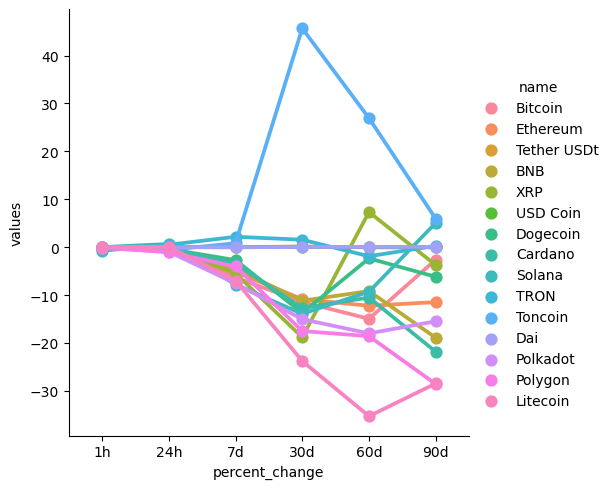

In [15]:
# Simple visualization with the newly cleaned data

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [16]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,25676.537712,2023-09-06 13:16:38.525001+00:00
0,Bitcoin,25676.537712,2023-09-06 13:17:05.261583+00:00
0,Bitcoin,25690.415308,2023-09-06 13:18:05.548973+00:00
0,Bitcoin,25691.873174,2023-09-06 13:19:05.766448+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

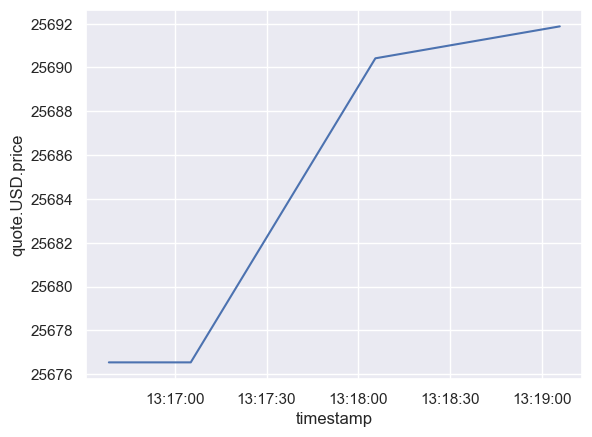

In [18]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)